# Solving Ordinary Differential Equations on Computer 

Various methods with varying capabilties and accuracy- Euler, RK2, RK4, Verlet


Solve:-  $\dfrac{dx}{dt}=xt^2+t^2 sin(t^3)$

Means, find x(t) with initial condition x(0)=1

Its analytical solution is: $x(t)=-\dfrac{3}{10}cos(t^3)-\dfrac{1}{10}sin(t^3) + \dfrac{13}{10}e^{(t^3/3)}$

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def f(t,x):
    return x*t*t+t*t*np.sin(t**3)

def analytical(t):
    return (-3/10)*np.cos(t**3)-.1*np.sin(t**3)+1.3*np.exp((t**3)/3)

# Euler

In [110]:
# Initial Conditions #

t=0
x=1

# Parameters #
h=0.01
ti=0
tf=1.0

t_arr=[]
x_arr=[]
while (t<tf):
    x=x+h*f(t,x)
    t=t+h
    t_arr.append(t)
    x_arr.append(x)
    

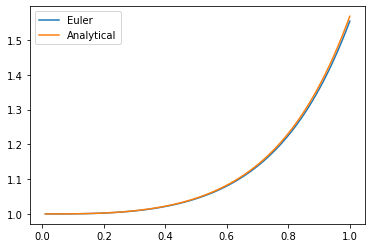

In [111]:
plt.plot(t_arr,x_arr,label="Euler")
plt.plot(t_arr,analytical(np.array(t_arr)),label="Analytical")
plt.legend()

# RK2 Method 

In [81]:
# Initial Conditions #

t=0
x=1

# Parameters #
h=0.01
ti=0
tf=1.0

t_arr=[]
x_arr=[]
while (t<tf):
    k1=h*f(t,x)
    k2=h*f(t+h/2.0,x+k1/2.0)
    x+=k2
    t=t+h
    t_arr.append(t)
    x_arr.append(x)

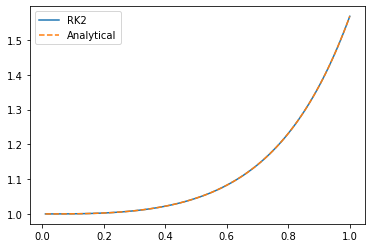

In [82]:
plt.plot(t_arr,x_arr,label="RK2")
plt.plot(t_arr,analytical(np.array(t_arr)),"--",label="Analytical")
plt.legend()

# RK4 Method

In [83]:
# Initial Conditions #

t=0
x=1

# Parameters #
h=0.1
ti=0
tf=1.0

t_arr=[]
x_arr=[]
while (t<tf):
    k1=h*f(t,x)
    k2=h*f(t+h/2.0,x+k1/2.0)
    k3=h*f(t+h/2.0,x+k2/2.0)
    k4=h*f(t+h,x+k3)
    x+=(k1+2*k2+2*k3+k4)/6.0
    t=t+h
    t_arr.append(t)
    x_arr.append(x)

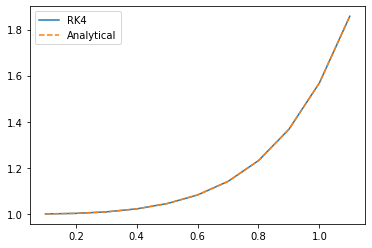

In [84]:
plt.plot(t_arr,x_arr,label="RK4")
plt.plot(t_arr,analytical(np.array(t_arr)),"--",label="Analytical")
plt.legend()

# Solve SHM equation 

$m\ddot{y}+ky=0$  
with initial conditions y(0)=1 and $\dot{y}(0)=0$

Take m=1=k for simplicity $\implies \ddot{y}+y=0$. 
Equation can be decomposed into 2 coupled first order equations and solve them simultaneously :

Put $\boxed{\dot{y}=z}$ & $\boxed{\dot{z}=-y}$  initial conditions y(0)=1 & z(0)=0

In [112]:

def f(t,y,z):
    return z

def g(t,y,z):
    return -y

h=.05
t=0
y=1
z=0

t_arr=[]
y_arr=[]
z_arr=[]
while(t<=10.0):
    k1=h*f(t,y,z)
    m1=h*g(t,y,z)
    k2=h*f(t+h/2.0,y+k1/2.0,z+m1/2.0)
    m2=h*g(t+h/2.0,y+k1/2,z+m1/2.0)
    k3=h*f(t+h/2.0,y+k2/2.0,z+m2/2.0)
    m3=h*g(t+h/2.0,y+k2/2.0,z+m2/2.0)
    k4=h*f(t+h,y+k3,z+m3)
    m4=h*g(t+h,y+k3,z+m3)
    y=y+(k1+2*k2+2*k3+k4)/6.0
    z=z+(m1+2*m2+2*m3+m4)/6.0
    t=t+h
    t_arr.append(t)
    y_arr.append(y)
    z_arr.append(z)
    


Text(0.5, 1.0, 'Solution of Simple Harmonic Oscillator')

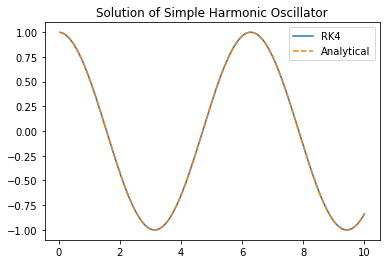

In [113]:
plt.plot(t_arr,y_arr,label="RK4")
plt.plot(t_arr,np.cos(np.array(t_arr)),"--",label="Analytical")
plt.legend()
plt.title("Solution of Simple Harmonic Oscillator")

# Solve Using Verlet

$F=-ky \implies a=-\dfrac{k}{m}y$

Algorithm:

$y(t+\Delta t)\approx 2y(t)-y(t-\Delta t)+a (\Delta t)^2$ 

$v(t)=\dfrac{y(t+\Delta t)-y(t-\Delta t)}{2\Delta t}$

In [124]:
h=.01

t_arr=[]
y_arr=[]
v_arr=[]

t_arr.append(0)
y_arr.append(1)
v_arr.append(0)

t=0
i=0
while(t<=10.0):
    acc=-y_arr[i]
    if i==0:
        vel=v_arr[i]+acc*h
        y=y_arr[i]+vel*h
    else:
        y=2*y_arr[i]-y_arr[i-1]+acc*h*h
        
    # Energy[i]= 1/2mv^2 + 1/2 kx^2
    t=t+h
    i=i+1
    t_arr.append(t)
    y_arr.append(y)
    


Text(0.5, 1.0, 'Solution of Simple Harmonic Oscillator')

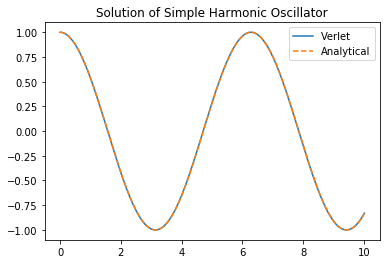

In [125]:
plt.plot(t_arr,y_arr,label="Verlet")
plt.plot(t_arr,np.cos(np.array(t_arr)),"--",label="Analytical")
plt.legend()
plt.title("Solution of Simple Harmonic Oscillator")